In [8]:
import torch
import torch.nn as nn
from utils import v_wrap, set_init, push_and_pull, record
import torch.nn.functional as F
import torch.multiprocessing as mp
from shared_adam import SharedAdam
import gym
import os
from acnet import Net, Worker

In [9]:
os.environ["OMP_NUM_THREADS"] = "1"

UPDATE_GLOBAL_ITER = 5
GAMMA = 0.9
MAX_EP = 500

env = gym.make('CartPole-v0')
N_S = env.observation_space.shape[0]
N_A = env.action_space.n

w10 Ep: 100 | Ep_r: 14
w11 Ep: 200 | Ep_r: 16
w02 Ep: 300 | Ep_r: 19
w01 Ep: 400 | Ep_r: 19
w02 Ep: 500 | Ep_r: 19
w03 Ep: 600 | Ep_r: 23
w07 Ep: 700 | Ep_r: 24
w08 Ep: 800 | Ep_r: 25
w15 Ep: 900 | Ep_r: 21
w09 Ep: 1000 | Ep_r: 22
w04 Ep: 1100 | Ep_r: 22
w08 Ep: 1200 | Ep_r: 25
w09 Ep: 1300 | Ep_r: 25
w10 Ep: 1400 | Ep_r: 27
w14 Ep: 1500 | Ep_r: 27
w11 Ep: 1600 | Ep_r: 30
w15 Ep: 1700 | Ep_r: 35
w06 Ep: 1800 | Ep_r: 42
w05 Ep: 1900 | Ep_r: 48
w09 Ep: 2000 | Ep_r: 52
w07 Ep: 2100 | Ep_r: 74
w10 Ep: 2200 | Ep_r: 78
w09 Ep: 2300 | Ep_r: 127
w14 Ep: 2400 | Ep_r: 148
w12 Ep: 2500 | Ep_r: 183
w04 Ep: 2600 | Ep_r: 186
w06 Ep: 2700 | Ep_r: 226
w01 Ep: 2800 | Ep_r: 229
w07 Ep: 2900 | Ep_r: 215
w02 Ep: 3000 | Ep_r: 221


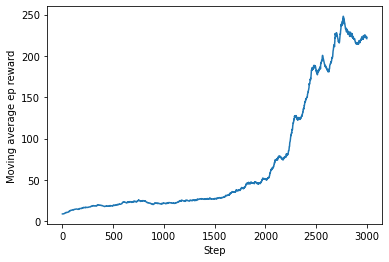

In [10]:
gnet = Net(N_S, N_A)        # global network
gnet.share_memory()         # share the global parameters in multiprocessing
opt = SharedAdam(gnet.parameters(), lr=1e-4, betas=(0.92, 0.999))      # global optimizer
global_ep, global_ep_r, res_queue = mp.Value('i', 0), mp.Value('d', 0.), mp.Queue()

# parallel training
workers = [Worker(gnet, opt, global_ep, global_ep_r, res_queue, i) for i in range(mp.cpu_count())]
[w.start() for w in workers]
res = []                    # record episode reward to plot
while True:
    r = res_queue.get()
    if r is not None:
        res.append(r)
    else:
        break
[w.join() for w in workers]

import matplotlib.pyplot as plt
plt.plot(res)
plt.ylabel('Moving average ep reward')
plt.xlabel('Step')
plt.show()

In [14]:
len(res)

3000